## Objective - Predict age of Abalone from the other nummerical variables

## Calculate age = Rings x 1.5

In [117]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
 

#### Read in the Data

In [118]:
df = pd.read_csv("data/abalone_headers.csv")
print(df.shape)
df.head()

(4177, 9)


,SEX,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


#### Data Exploration

In [119]:
print(df.shape)
print(df.describe())

(4177, 9)
            Length     Diameter       Height  Whole_weight  Shucked_weight  \
count  4177.000000  4177.000000  4177.000000   4177.000000     4177.000000   
mean      0.523992     0.407881     0.139516      0.828742        0.359367   
std       0.120093     0.099240     0.041827      0.490389        0.221963   
min       0.075000     0.055000     0.000000      0.002000        0.001000   
25%       0.450000     0.350000     0.115000      0.441500        0.186000   
50%       0.545000     0.425000     0.140000      0.799500        0.336000   
75%       0.615000     0.480000     0.165000      1.153000        0.502000   
max       0.815000     0.650000     1.130000      2.825500        1.488000   

       Viscera_weight  Shell_weight        Rings  
count     4177.000000   4177.000000  4177.000000  
mean         0.180594      0.238831     9.933684  
std          0.109614      0.139203     3.224169  
min          0.000500      0.001500     1.000000  
25%          0.093500      0.130

In [120]:
# remove the row with Height = 0 using a row condition
df = df[df.Height != 0] 
print(df.shape)
print(df.describe())

(4175, 9)
            Length    Diameter       Height  Whole_weight  Shucked_weight  \
count  4175.000000  4175.00000  4175.000000   4175.000000     4175.000000   
mean      0.524065     0.40794     0.139583      0.829005        0.359476   
std       0.120069     0.09922     0.041725      0.490349        0.221954   
min       0.075000     0.05500     0.010000      0.002000        0.001000   
25%       0.450000     0.35000     0.115000      0.442250        0.186250   
50%       0.545000     0.42500     0.140000      0.800000        0.336000   
75%       0.615000     0.48000     0.165000      1.153500        0.502000   
max       0.815000     0.65000     1.130000      2.825500        1.488000   

       Viscera_weight  Shell_weight        Rings  
count     4175.000000   4175.000000  4175.000000  
mean         0.180653      0.238834     9.935090  
std          0.109605      0.139212     3.224227  
min          0.000500      0.001500     1.000000  
25%          0.093500      0.130000     8

**Moderate correlation between Rings and features. Expect moderate model**

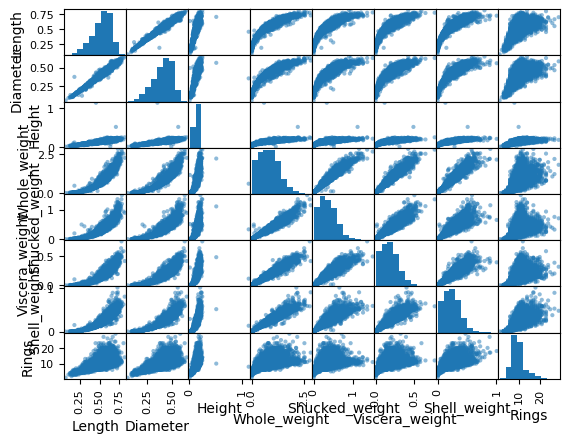

In [135]:
scatter_matrix(df)
plt.show()
#scatter_matrix(df)
#plt.savefig('plots/abaloneLR.png')

**It might be challenging to distinguish age groups in the graph because the data is widely dispersed, lacking clear boundaries or separation lines that represent distinct ages. There could be a quadratic relationship between age and some features, and the plot suggests different populations of abalone at various ages. **

#### Prepare the Data

In [122]:

X = df.drop(columns=['Rings','SEX'])
y = df.Rings
print(X.shape)

(4175, 7)


In [123]:
# split into training and test data
# random_state=1 ensures the split is the same every time we run it

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
# X_train.head()

(3131, 7)
(3131,)
(1044, 7)
(1044,)


#### Build the model

In [124]:
model = LinearRegression()
model.fit(X_train, y_train)
print('intercept:', model.intercept_)
print('slope:', model.coef_)
print('Coefficient of Determination R^2 :',  model.score(X_train, y_train))

intercept: 3.042912983425272
slope: [ -2.0160073   14.2258051    9.9676144    8.92912367 -19.73273439
  -8.83815136   8.38328195]
Coefficient of Determination R^2 : 0.5283630582063565


**R^2 = 0.53 is less than expected, as there was good correlation between features and target variable**

#### Claculate the RMSE for the test data

In [125]:
yhat = model.predict(X_test)
# print (yhat)
print(mean_squared_error(y_test, yhat, squared=False))

2.251371123188242


**RMSE value 2.23 is reasonably low compared to an average Rings of about 10
**

RESET DATA / Sex feuture**

In [126]:
print(df.shape)
df.head()

(4175, 9)


,SEX,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


## Iterate, include SEX as a Feature

In [127]:
X = df.drop(columns = 'Rings')
y = df.Rings
X.head()

,SEX,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [128]:
# one hot encode the Species variable.
X = pd.get_dummies(X)
X.tail()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,SEX_F,SEX_I,SEX_M
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,True,False,False
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,False,False,True
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,False,False,True
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,True,False,False
4176,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.4950,False,False,True


In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

#### Build the model

In [130]:
model = LinearRegression()
model.fit(X_train, y_train)
print('intercept:', model.intercept_)
print('slope:', model.coef_)
print('Coefficient of Determination R^2 :',  model.score(X_train, y_train))

intercept: 3.6964254155861527
slope: [ -0.99217426  11.93624789   9.0455145    8.64734723 -19.23103241
  -9.58348554   8.58957516   0.26358855  -0.54936761   0.28577906]
Coefficient of Determination R^2 : 0.5378671627742024


**R squared has increased from 0.53 to 0.54**

#### RMSE

**RMSE has come down from 2.3 to 2.2.**

In [131]:
yhat = model.predict(X_test)
print(mean_squared_error(y_test, yhat, squared=False))

2.221953275464313


In [132]:
print(df.shape)
df.head()

(4175, 9)


,SEX,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
